In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import VarianceThreshold
import plotly.express as px
import seaborn as sns
# Set 'main_dir' to location of the project folder

rounds = pd.read_csv("C:/Users/cokeo/OneDrive/Documents/csgo_round_snapshots.csv")
rounds.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [2]:
rounds.dtypes

time_left                    float64
ct_score                     float64
t_score                      float64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                  object
Length: 97, dtype: object

In [3]:

#dropping rounds played on cache because it is no longer in the map pool
rounds = rounds[rounds['map'] != 'de_cache']


#Checking to see amount of rounds played on each map
maps = rounds['map'].unique()

for i in range(len(maps)):
    num_rounds = len(rounds[rounds['map'] == maps[i]])
    print('There were', num_rounds,'played on',maps[i])

There were 22144 played on de_dust2
There were 18576 played on de_mirage
There were 19025 played on de_nuke
There were 23811 played on de_inferno
There were 14081 played on de_overpass
There were 11137 played on de_vertigo
There were 13491 played on de_train


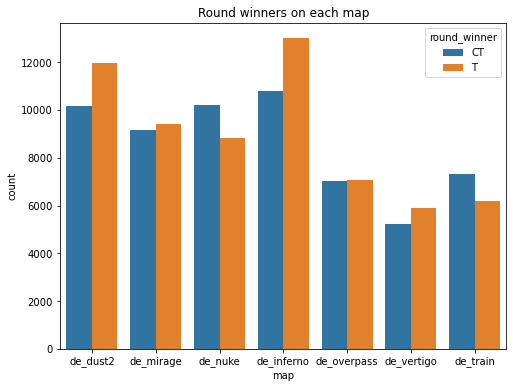

In [4]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=rounds)
ax.set(title='Round winners on each map')
plt.show()

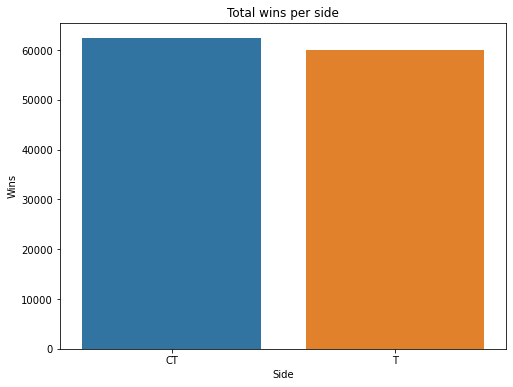

In [5]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=rounds['round_winner'].unique(), y=rounds['round_winner'].value_counts())
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

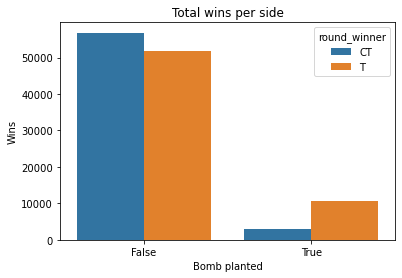

In [18]:
ax = sns.countplot(x="bomb_planted", hue="round_winner", data=rounds)
ax.set(title='Total wins per side', xlabel='Bomb planted', ylabel='Wins')
plt.show()